# Create an Occupancy map from waypoints on the left and right edges of track

In [8]:
import numpy as np
from ROAR.utilities_module.occupancy_map import OccupancyGridMap
from pathlib import Path
import logging
from pathlib import Path
from ROAR_Sim.configurations.configuration import Configuration as CarlaConfig
from ROAR_Sim.carla_client.carla_runner import CarlaRunner
from ROAR.agent_module.pure_pursuit_agent import PurePursuitAgent
from ROAR.configurations.configuration import Configuration as AgentConfig
from ROAR.agent_module.michael_pid_agent import PIDAgent
from ROAR.agent_module.rl_prep_agent import RLPrepAgent
from ROAR.agent_module.special_agents.waypoint_generating_agent import WaypointGeneratigAgent
from ROAR.agent_module.special_agents.recording_agent import RecordingAgent
import argparse
from misc.utils import str2bool
from ROAR.utilities_module.data_structures_models import Transform
import cv2

1. Read Left and Right Waypoints

In [9]:
#file = open("C://Users//roar//Desktop//ROAR_record//ROAR_record//data//output//border_waypoints//right_side_major_map_waypoints.txt")
file = open(".//data//output//border_waypoints//new_right_side_waypoints.txt")
full_list = []
for r in file:
    cur_list = []
    seg = r.rstrip().split(',')
    for item in seg:
        cur_list.append(float(item))
    full_list.append(cur_list)
np_right_waypoints = np.array(full_list)


In [3]:
np_right_waypoints

array([[2599.19995117,  104.74610138, 4372.60009766],
       [2599.19995117,  104.68240356, 4372.60009766],
       [2599.19995117,  104.59420013, 4372.60009766],
       ...,
       [2603.32128906,  107.62763214, 4270.70849609],
       [2603.32128906,  107.62680054, 4270.72265625],
       [2603.32128906,  107.62595367, 4270.73632812]])

In [10]:
#file = open("C://Users//roar//Desktop//ROAR_record//ROAR_record//data//output//border_waypoints//left_side_major_map_waypoints.txt")
file = open(".//data//output//border_waypoints//new_left_side_waypoints.txt")
full_list = []
for r in file:
    cur_list = []
    seg = r.rstrip().split(',')
    for item in seg:
        cur_list.append(float(item))
    full_list.append(cur_list)
np_left_waypoints = np.array(full_list)

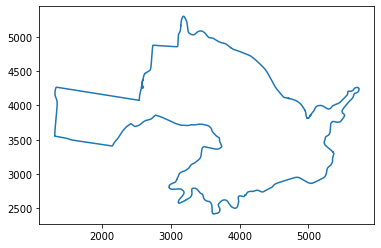

In [36]:
import matplotlib.pyplot as plt

left_x = np_left_waypoints[:, 0]
left_y = np_left_waypoints[:, 1]
left_z = np_left_waypoints[:, 2]

#indexes = np.arange(len(left_x))

plt.plot(left_x, left_z)

5725.97900390625 509.1268310546875 5289.4775390625
5734.34716796875 509.12603759765625 5301.53857421875


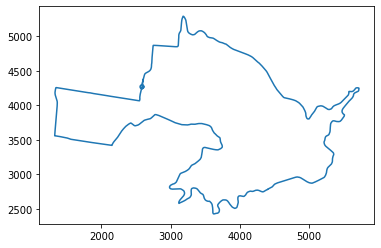

In [37]:
right_x = np_right_waypoints[:, 0]
right_y = np_right_waypoints[:, 1]
right_z = np_right_waypoints[:, 2]

#indexes = np.arange(len(left_x))

max_rx = np.max(right_x)
max_ry = np.max(right_y)
max_rz = np.max(right_z)

max_lx = np.max(left_x)
max_ly = np.max(left_y)
max_lz = np.max(left_z)



print(max_rx, max_ry, max_rz)
print(max_lx, max_ly, max_lz)


plt.plot(right_x, right_z)

68352 46068


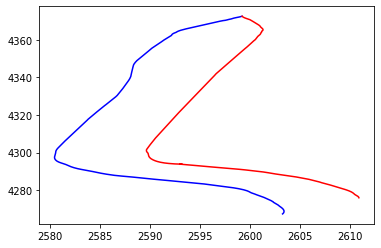

In [38]:
print(len(left_x), len(right_x))
plt.plot(left_x[:1000], left_z[:1000], "b", right_x[:1000], right_z[:1000], "r")

2. Create an Occupancy Object and update points onto map

In [39]:
agent_config = AgentConfig.parse_file(Path("./ROAR/configurations/carla/carla_agent_configuration.json"))
agent = PIDAgent(vehicle=None, agent_settings=agent_config)

mymap = OccupancyGridMap(agent)
mymap._initialize_map()

# for _ in range(30):
#     mymap.update(np_left_waypoints)

mymap.update_to_one(np_left_waypoints)
mymap.update_to_one(np_right_waypoints)

#mymap.visualize()


3. save the map

In [40]:
mymap.save()

4. test the .npy file by reading it

In [14]:
agent_config = AgentConfig.parse_file(Path("./ROAR/configurations/carla/carla_agent_configuration.json"))
agent = PIDAgent(vehicle=None, agent_settings=agent_config)

loadmap = OccupancyGridMap(agent)
#loadmap.load_from_file(Path("C://Users//roar//Desktop//ROAR_record//ROAR_record//data//output//occupancy_map//occu_map.npy"))
#loadmap.load_from_file(Path("data//output//occupancy_map//occu_map.npy"))
loadmap.load_from_file(Path("data//cleaned_occ_map//berkeley_major_cleaned_occu_map.npy"))

In [15]:
local_transform = Transform.from_array([2597.524658203125,102.68222045898438,4378.91748046875, 0 , 0 ,0])

local_map = loadmap.get_map(transform= local_transform, show_agent= True)

In [16]:

cv2.imshow("local_map", local_map) # uncomment to show occu map
cv2.waitKey(0)
cv2.destroyAllWindows()


In [44]:
#loadmap.visualize()